### Analyse Exploratoire du fichier myreport_sql_statistic_full.csv

####  Imports (fichier & modules)

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [192]:
tab = pd.read_csv('../../data/logServer/myreport_sql_statistic_full.csv', sep=',')

####  Le fichier myreport_ping_full.csv : taille, colonnes

In [194]:
print("Il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

Il y a  2882  lignes et  12  colonnes dans le data frame


In [195]:
lst=list(tab.columns)
lst

['Date et heure',
 'Date et heure(RAW)',
 'Nombre de requêtes de lots/s',
 'Nombre de requêtes de lots/s(RAW)',
 'Compilations SQL/s',
 'Compilations SQL/s(RAW)',
 'Recompilations SQL/s',
 'Recompilations SQL/s(RAW)',
 'Temps mort',
 'Temps mort(RAW)',
 'Couverture',
 'Couverture(RAW)']

In [196]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date et heure                      2882 non-null   object 
 1   Date et heure(RAW)                 2881 non-null   float64
 2   Nombre de requêtes de lots/s       2195 non-null   object 
 3   Nombre de requêtes de lots/s(RAW)  2194 non-null   float64
 4   Compilations SQL/s                 1912 non-null   object 
 5   Compilations SQL/s(RAW)            2194 non-null   float64
 6   Recompilations SQL/s               990 non-null    object 
 7   Recompilations SQL/s(RAW)          2194 non-null   float64
 8   Temps mort                         2195 non-null   object 
 9   Temps mort(RAW)                    2194 non-null   float64
 10  Couverture                         2882 non-null   object 
 11  Couverture(RAW)                    2881 non-null   float

In [197]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                        2882
Date et heure(RAW)                   2881
Nombre de requêtes de lots/s           96
Nombre de requêtes de lots/s(RAW)    1498
Compilations SQL/s                     84
Compilations SQL/s(RAW)              1608
Recompilations SQL/s                   18
Recompilations SQL/s(RAW)             492
Temps mort                              1
Temps mort(RAW)                         1
Couverture                              3
Couverture(RAW)                         2
dtype: int64


In [198]:
tab.head()

,Date et heure,Date et heure(RAW),Nombre de requêtes de lots/s,Nombre de requêtes de lots/s(RAW),Compilations SQL/s,Compilations SQL/s(RAW),Recompilations SQL/s,Recompilations SQL/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,"0,06 #",0.0622,"0,08 #",0.0802,NaN,0.0013,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,"0,02 #",0.0231,NaN,0.0051,NaN,0.0008,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,"0,07 #",0.0680,"0,09 #",0.0856,"0,04 #",0.0391,0 %,0.0,100 %,10000.0


### Transformation des dates

In [207]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['Date et heure'] = tab["Date et heure"].str.split(" - ").str[0]

tab=tab.iloc[:-5]
# Si vous avez un format comme "JJ/MM/AAAA HH:MM:SS", vous pouvez préciser :
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")

In [209]:
tab.head()

,Date et heure,Date et heure(RAW),Nombre de requêtes de lots/s,Nombre de requêtes de lots/s(RAW),Compilations SQL/s,Compilations SQL/s(RAW),Recompilations SQL/s,Recompilations SQL/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,2024-08-13 00:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,2024-08-13 01:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,2024-08-13 02:00:00,45517.041667,"0,06 #",0.0622,"0,08 #",0.0802,NaN,0.0013,0 %,0.0,100 %,10000.0
3,2024-08-13 03:00:00,45517.083333,"0,02 #",0.0231,NaN,0.0051,NaN,0.0008,0 %,0.0,100 %,10000.0
4,2024-08-13 04:00:00,45517.125000,"0,07 #",0.0680,"0,09 #",0.0856,"0,04 #",0.0391,0 %,0.0,100 %,10000.0


In [211]:
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [213]:
tab.shape

(1248, 12)

 #### Réagencement et Suppression des colonnes

In [215]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [217]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Nombre de requêtes de lots/s"])
tab = tab.drop(columns=["Compilations SQL/s"])
tab = tab.drop(columns=["Recompilations SQL/s"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

# renommage des colonnes
tab.rename(columns={"Nombre de requêtes de lots/s(RAW)": "Nombre de requêtes de lots/s (sql stat)(#)"}, inplace=True)
tab.rename(columns={"Compilations SQL/s(RAW)": "Compilations SQL/s (sql stat)(#)"}, inplace=True)
tab.rename(columns={"Recompilations SQL/s(RAW)": "Recompilations SQL/s (sql stat)(#)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort (sql stat)(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture (sql stat)(%)"}, inplace=True)


In [219]:
tab.head()

,Temps mort (sql stat)(%),Couverture (sql stat)(%),Date et heure,Nombre de requêtes de lots/s (sql stat)(#),Compilations SQL/s (sql stat)(#),Recompilations SQL/s (sql stat)(#)
288,0.0,10000.0,2024-08-25 00:00:00,0.3948,0.4129,0.0083
289,0.0,10000.0,2024-08-25 01:00:00,0.3319,0.4546,0.0257
290,0.0,10000.0,2024-08-25 02:00:00,0.1087,0.1780,0.0022
291,0.0,10000.0,2024-08-25 03:00:00,0.0237,0.0046,0.0006
292,0.0,10000.0,2024-08-25 04:00:00,0.0934,0.1134,0.0137


In [221]:
print(type(tab["Date et heure"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Analyse temporelle

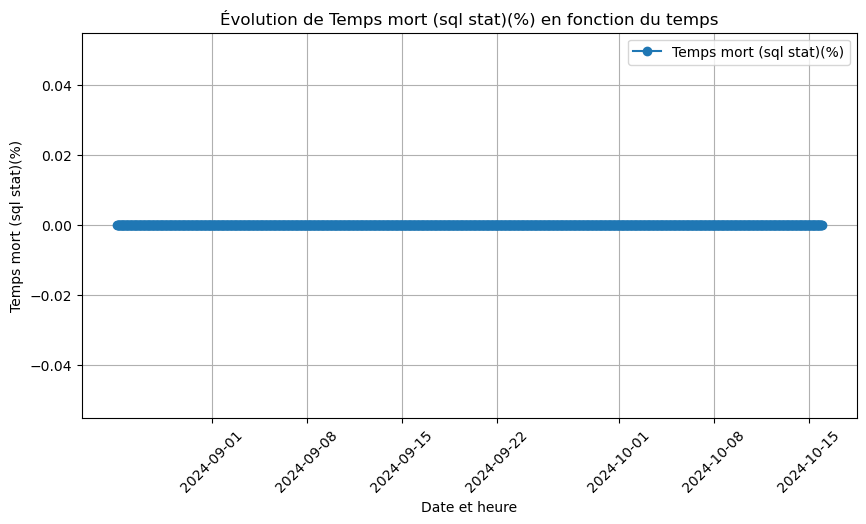

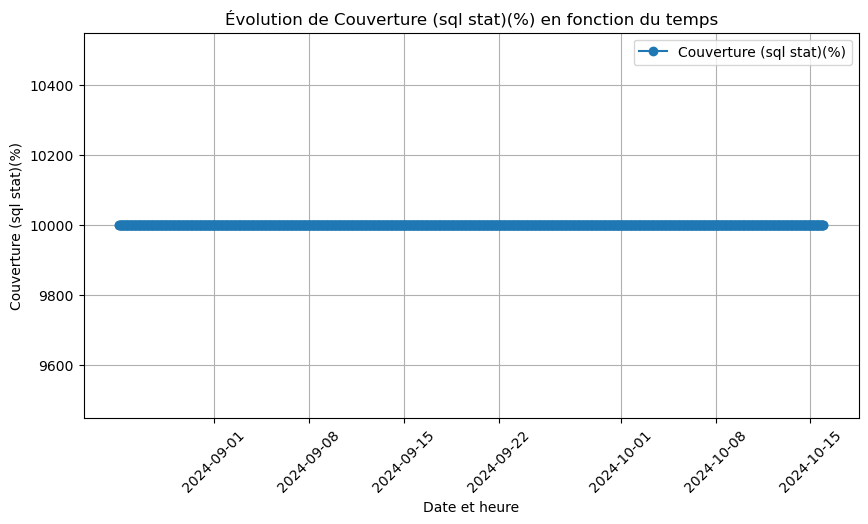

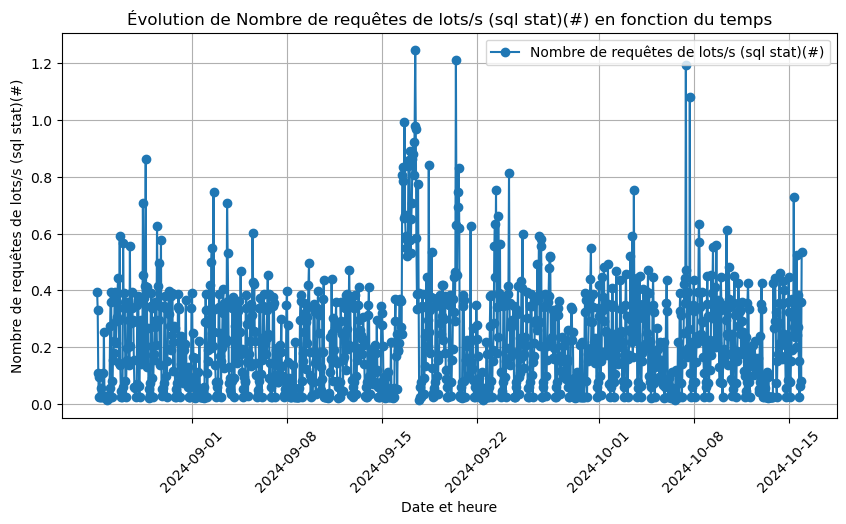

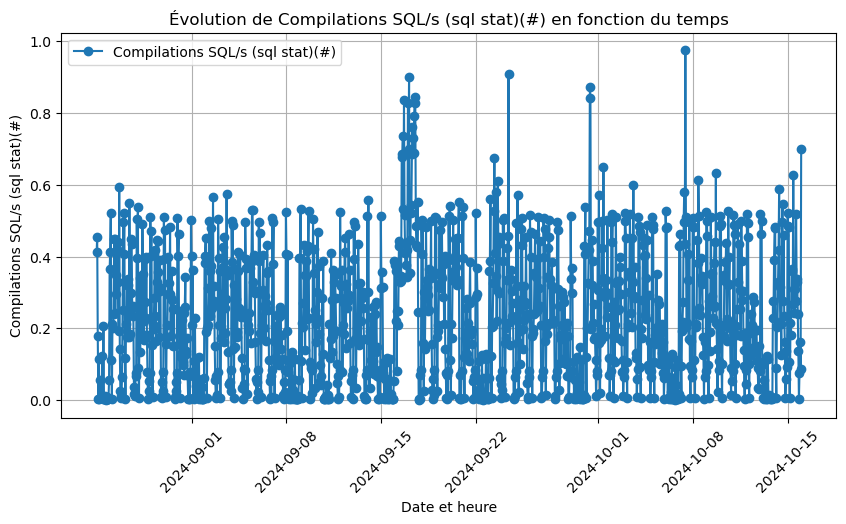

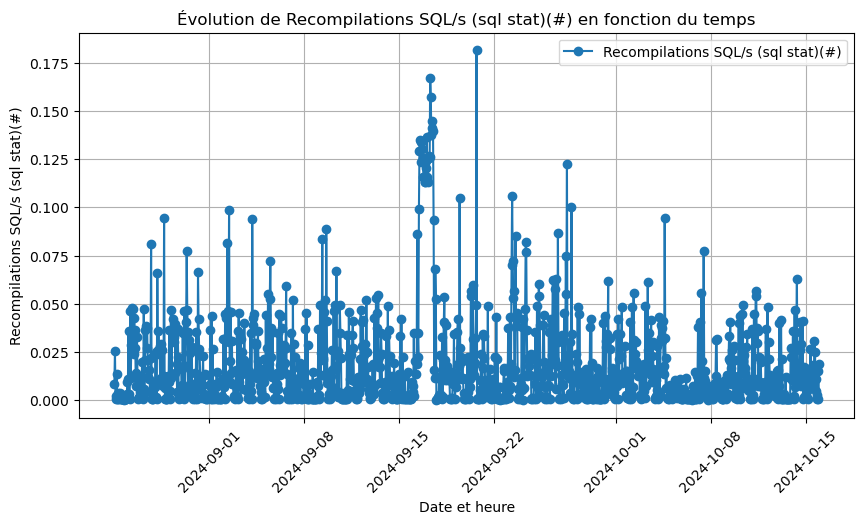

In [224]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["Date et heure", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

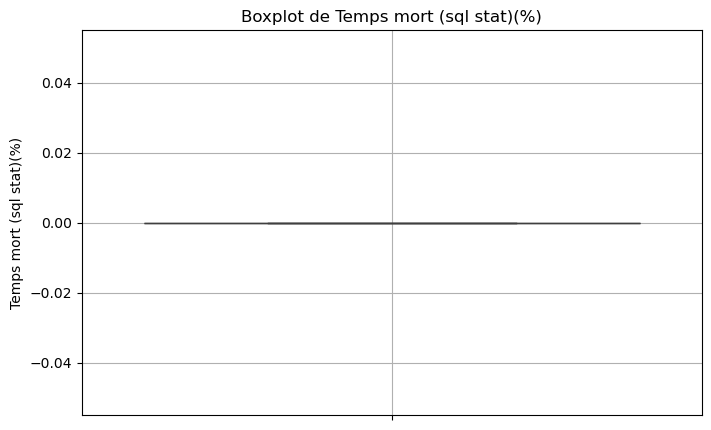

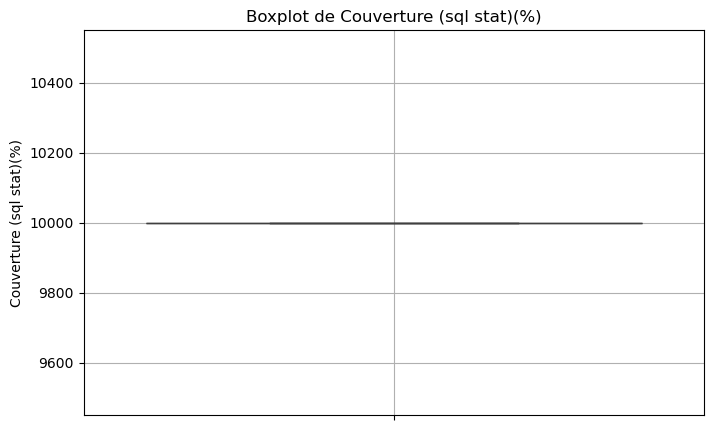

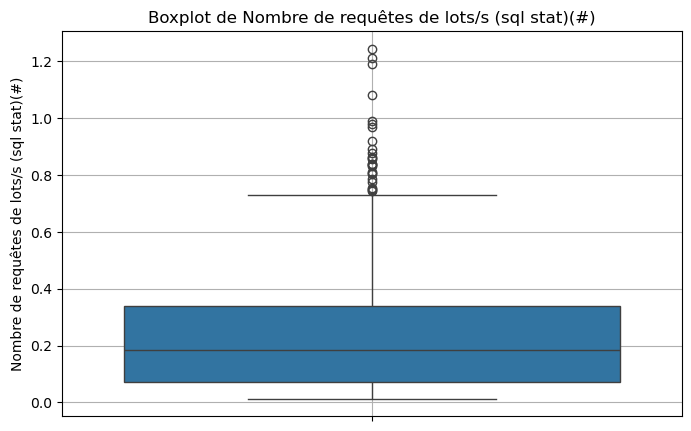

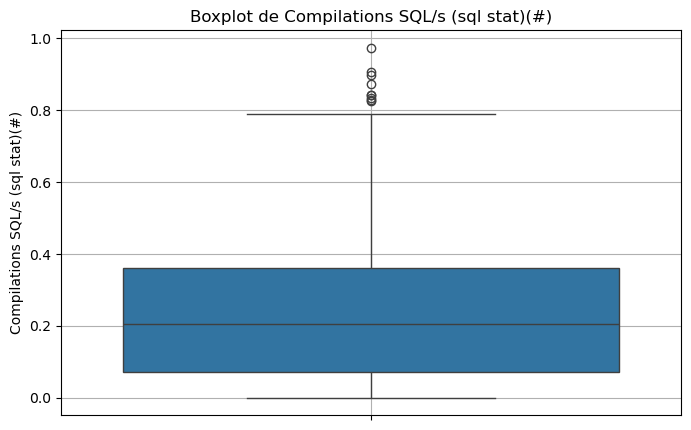

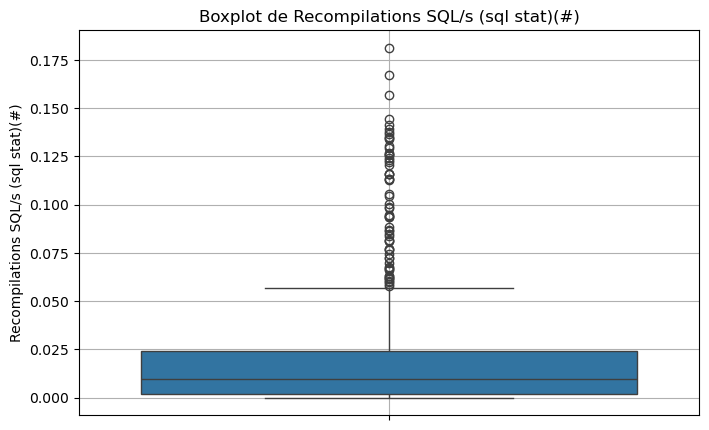

In [226]:
import seaborn as sns

# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

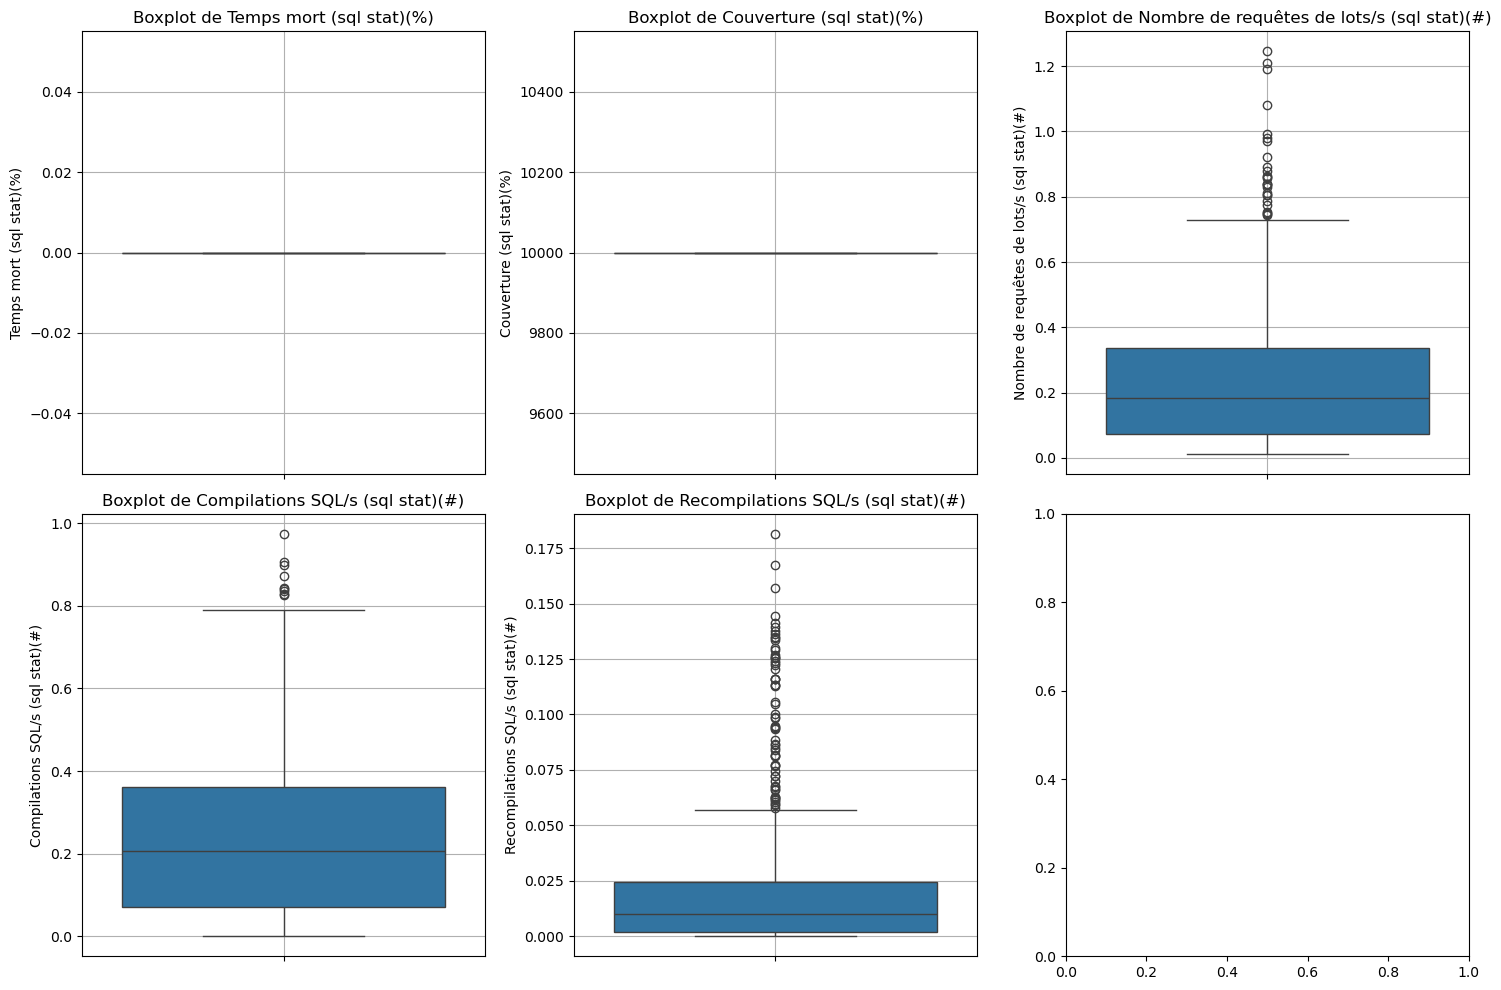

In [228]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [231]:
tab = tab.drop(columns=["Temps mort (sql stat)(%)"])
tab = tab.drop(columns=["Couverture (sql stat)(%)"])

 #### Enregistrement du nouveau dataframe dans un nouveau csv

In [234]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_sql_statistic_filtered.csv", index=False, encoding='utf-8')